In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

In [37]:
df = pd.read_csv('companies.csv')
df = df['symbol'].unique()
tickers = df.tolist()

In [91]:
df_stocks = pd.read_csv('sp500_joined_closes.csv')
df_stocks = df_stocks.fillna(df_stocks.mean())

In [95]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [96]:
df_stocks.set_index("Date", inplace=True)

In [98]:
df_stocks.interpolate(method='linear', inplace=True)

In [101]:
df_stocks = df_stocks.iloc[::-1]

In [212]:
ticks = ['A', 'AAN', 'AAP', 'AAPL']

In [213]:
stocks = df_stocks[['A', 'AAN', 'AAP', 'AAPL']]

In [214]:
stock_return = stocks.pct_change().round(4)*100
# stock_return

In [215]:
mean_returns = stock_return.mean()
cov_matrix = stock_return.cov()

In [253]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 10000
simulation_res = np.zeros((4+len(ticks)-1,num_iterations))

In [254]:
for i in range(num_iterations):
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)

In [255]:
#calculate the return and std for every step
portfolio_return = np.sum(mean_returns * weights)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [256]:
simulation_res[0,i] = portfolio_return
simulation_res[1,i] = portfolio_std_dev

In [257]:
#calculate Sharpe Ratio and store it in the array
simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]

In [258]:
for j in range(len(weights)):
    simulation_res[j+3, i] = weights[j]

In [259]:
sim_frame = pd.DataFrame(simulation_res.T, columns=['ret', 'stdev', 'sharpe',ticks[0], ticks[1], ticks[2], ticks[3]])

In [260]:
sim_frame

,ret,stdev,sharpe,A,AAN,AAP,AAPL
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [261]:
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]

In [262]:
print("The portfolio for Sharpe Ratio:\n", max_sharpe)
print("The portfolio for min risk:\n", min_std)

The portfolio for Sharpe Ratio:
 ret       0.023032
stdev     2.362252
sharpe    0.009750
A         0.716818
AAN       0.041802
AAP       0.146875
AAPL      0.094505
Name: 9999, dtype: float64
The portfolio for min risk:
 ret       0.0
stdev     0.0
sharpe    0.0
A         0.0
AAN       0.0
AAP       0.0
AAPL      0.0
Name: 0, dtype: float64


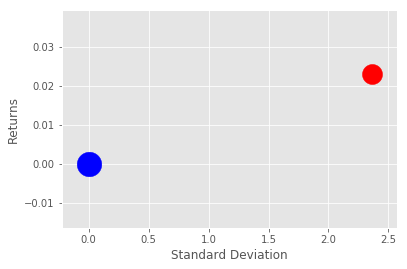

In [270]:
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.scatter(max_sharpe[1], max_sharpe[0], color='r', s=400)
plt.scatter(min_std[1], min_std[0], color='b', s=600)
plt.show()